<img src="https://github.com/PySport/kloppy/raw/master/docs/logo.png"  style="width: 40%; margin: auto" />

<center> <h1>Working with event data</h1> </center>

<img src="assets/event_data-field.png" style="width: 60%; margin: auto; margin-top: 50px" />

# Content

<ul>
    <li>Example</li>
    <li>Install kloppy</li>
    <li>Loading open data</li>
    <li>Pandas</li>
    <li>Plotting using mplsoccer</li>
    <li>Using local data</li>
    <li>Supported providers</li>
</ul>

# Example

<div style="width: 80%; display: block; margin: auto; margin-top: 5%">
    <video src="assets/groningen2.mov" autoplay controls style="outline: none;"></video>
    <small>source: https://gist.github.com/koenvo/c450c2e08ad8f0c38bb3d183b2d65648</small>
</div>

# Install kloppy

In [44]:
!pip install kloppy

You should consider upgrading via the '/Users/koen/PycharmProjects/kloppy/.venv/bin/python3.7 -m pip install --upgrade pip' command.


# StatsBomb Open Data

<img src="assets/statsbomb.png" style="width: 60%; margin: auto; margin-top: 15%; margin-bottom: 15%" />

source: https://github.com/statsbomb/open-data

# Loading data

In [22]:
from kloppy import datasets

In [23]:
dataset = datasets.load("statsbomb")

/Users/koen/PycharmProjects/kloppy/.venv/lib/python3.7/site-packages/kloppy/infra/datasets/event/statsbomb.py:12: UserWarning: 

You are about to use StatsBomb public data.
By using this data, you are agreeing to the user agreement. 
The user agreement can be found here: https://github.com/statsbomb/open-data/blob/master/LICENSE.pdf

  "\n\nYou are about to use StatsBomb public data."


In [24]:
home_team, away_team = dataset.metadata.teams
print(f"{home_team} - {away_team}")

Barcelona - Deportivo Alavés


# Loading a specific match

In [25]:
dataset = datasets.load("statsbomb", match_id="9880")

In [26]:
home_team, away_team = dataset.metadata.teams
print(f"{home_team} - {away_team}")

Barcelona - Valencia


In [27]:
print(f"Data: {len(dataset.events)}")

Data: 4126


# Loading options

In [28]:
dataset = datasets.load("statsbomb", match_id="9880", options={"event_types": ["PASS"]})

In [29]:
home_team, away_team = dataset.metadata.teams
print(f"{home_team} - {away_team}")

Barcelona - Valencia


In [30]:
print(f"Data: {len(dataset.events)}")

Data: 1087


# Player info

In [31]:
for player in home_team.players:
    print(f"Player: {player} - {player.player_id}")

Player: Philippe Coutinho Correia - 3501
Player: Sergio Busquets i Burgos - 5203
Player: Jordi Alba Ramos - 5211
Player: Gerard Piqué Bernabéu - 5213
Player: Andrés Iniesta Luján - 5216
Player: Luis Alberto Suárez Díaz - 5246
Player: Ousmane Dembélé - 5477
Player: Samuel Yves Umtiti - 5492
Player: Lionel Andrés Messi Cuccittini - 5503
Player: José Paulo Bezzera Maciel Júnior - 5542
Player: Thomas Vermaelen - 6332
Player: Nélson Cabral Semedo - 6374
Player: Sergi Roberto Carnicer - 6379
Player: Francisco Alcácer García - 6402
Player: Denis Suárez Fernández - 6609
Player: Jasper Cillessen - 8652
Player: André Filipe Tavares Gomes - 10802
Player: Marc-André ter Stegen - 20055


In [32]:
suarez = home_team.get_player_by_id(5246)
print(f"Name: {suarez.name}")
print(f"Jersey number: {suarez.jersey_no}")

Name: Luis Alberto Suárez Díaz
Jersey number: 9


# Pandas

In [33]:
suarez_passes_df = dataset.filter(lambda event: event.player == suarez).to_pandas(
    additional_columns={"player_name": lambda event: str(event.player)}
)

In [34]:
suarez_passes_df

,event_id,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,body_part_type,player_name,set_piece_type
0,6e8df155-d618-4b7a-85ad-7a64ca61aad1,PASS,COMPLETE,True,1,313.893,314.616,alive,217,217,5246,75.5,47.5,69.5,43.5,5542,RIGHT_FOOT,Luis Alberto Suárez Díaz,NaN
1,b1b52af2-748b-4aaa-98b7-707edc69a11e,PASS,COMPLETE,True,1,495.501,497.196,alive,217,217,5246,92.5,15.5,84.5,32.5,5203,RIGHT_FOOT,Luis Alberto Suárez Díaz,NaN
2,d789cd3e-5f4f-4cf7-ad8c-9f1b72bea1bf,PASS,COMPLETE,True,1,799.106,801.721,alive,217,217,5246,84.5,33.5,109.5,30.5,5211,RIGHT_FOOT,Luis Alberto Suárez Díaz,NaN
3,e6997c8e-77f1-48c9-b30a-b7b5241105c6,PASS,COMPLETE,True,1,834.424,835.802,alive,217,217,5246,95.5,20.5,90.5,7.5,5216,LEFT_FOOT,Luis Alberto Suárez Díaz,NaN
4,ee73d246-f86c-44e2-837c-b5fd5bf4c42b,PASS,COMPLETE,True,1,957.346,959.280,alive,217,217,5246,102.5,24.5,98.5,45.5,5542,RIGHT_FOOT,Luis Alberto Suárez Díaz,NaN
5,9d6dfe16-d805-44a8-9b08-bcca8a27cd9c,PASS,COMPLETE,True,1,1449.826,1451.531,alive,217,217,5246,95.5,17.5,77.5,19.5,5216,RIGHT_FOOT,Luis Alberto Suárez Díaz,NaN
6,0e031810-8b46-4d6f-b2a4-ecb177342efb,PASS,COMPLETE,True,1,1522.383,1523.951,alive,217,217,5246,90.5,25.5,97.5,15.5,5211,RIGHT_FOOT,Luis Alberto Suárez Díaz,NaN
7,fe9f9b1d-687d-4265-a310-3761f5946d0b,PASS,COMPLETE,True,1,1526.764,1528.882,alive,217,217,5246,90.5,29.5,113.5,54.5,6379,RIGHT_FOOT,Luis Alberto Suárez Díaz,NaN
8,f384450a-afe8-4e85-8cb4-23cbe97d9148,PASS,COMPLETE,True,1,1581.593,1583.147,alive,217,217,5246,54.5,25.5,44.5,17.5,5211,RIGHT_FOOT,Luis Alberto Suárez Díaz,NaN
9,3cc475d6-3916-4f44-90fc-2bd0bf106e5a,PASS,COMPLETE,True,1,1816.471,1817.896,alive,217,217,5246,80.5,74.5,65.5,72.5,6379,RIGHT_FOOT,Luis Alberto Suárez Díaz,NaN


# Draw a pitch

In [35]:
from mplsoccer.pitch import Pitch

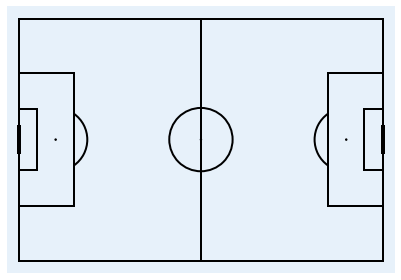

In [36]:
pitch = Pitch(pitch_color="#e7f1fa", line_zorder=1, line_color="black", pitch_type="statsbomb")
fig, ax = pitch.draw()

# Plotting the data

Player: Luis Alberto Suárez Díaz


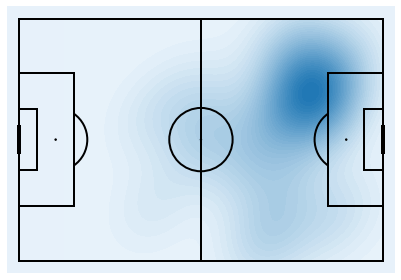

In [45]:
print(f"Player: {suarez}")
pitch = Pitch(pitch_color="#e7f1fa", line_zorder=1, line_color="black", pitch_type="statsbomb")
fig, ax = pitch.draw()

pitch.kdeplot(
    suarez_passes_df["coordinates_x"],
    suarez_passes_df["coordinates_y"],
    ax=ax,
    shade=True,
    n_levels=50,
);

# Working with local data

In [38]:
!wget https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/9880.json -O events.json
!wget https://raw.githubusercontent.com/statsbomb/open-data/master/data/lineups/9880.json -O lineup.json

--2021-03-18 13:24:02--  https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/9880.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3487738 (3,3M) [text/plain]
Saving to: ‘events.json’

events.json         100%[===================>]   3,33M  4,18MB/s    in 0,8s    

2021-03-18 13:24:03 (4,18 MB/s) - ‘events.json’ saved [3487738/3487738]

--2021-03-18 13:24:04--  https://raw.githubusercontent.com/statsbomb/open-data/master/data/lineups/9880.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7624 (7,4K) [te

# Working with local data

In [39]:
from kloppy import load_statsbomb_event_data

In [40]:
dataset = load_statsbomb_event_data("events.json", "lineup.json")

In [41]:
home_team, away_team = dataset.metadata.teams
print(f"{home_team} - {away_team}")

Barcelona - Valencia


# All supported event data providers

In [42]:
from kloppy import (
    load_metrica_json_event_data,
    load_opta_event_data,
    load_sportec_event_data,
    load_statsbomb_event_data,
    load_wyscout_event_data,
)

In [ ]:
dataset = load_statsbomb_event_data(event_data_filename, lineup_data_filename)

dataset = load_opta_event_data(f24_data_filename, f7_data_filename)

dataset = load_metrica_json_event_data(raw_data_filename, metadata_filename)

dataset = load_sportec_event_data(event_data_filename, match_data_filename)

dataset = load_wyscout_event_data(event_data_filename)

# Thanks for watching

Find us:

- twitter https://twitter.com/PySportOrg
- discord: https://t.co/oRtc3ZBrDh
- github: https://github.com/PySport
- docs: https://kloppy.pysport.org